In [1]:
# SIDDHI SONI 22CO118
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.shape

(1156, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.isna()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [7]:
df.isna().any()

START_DATE    False
END_DATE       True
CATEGORY       True
START          True
STOP           True
MILES         False
PURPOSE        True
dtype: bool

In [8]:
#Data Preprocessing
df['PURPOSE'].fillna("NOT",inplace=True)

In [10]:
#Changing the START_DATE and END_DATE to the date_time format
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')


In [11]:
#Splitting the START_DATE to date and time column 
from datetime import datetime

df['date']=pd.DatetimeIndex(df['START_DATE']).date
df['time']=pd.DatetimeIndex(df['START_DATE']).hour
df['day-night']=pd.cut(x=df['time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [12]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13.0,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15.0,Afternoon
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21.0,Night
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,2016-12-31,22.0,Night


In [13]:
df.dropna(inplace=True)

In [14]:
df.drop_duplicates(inplace=True)

In [17]:
#checking of unique values 
obj=(df.dtypes=='object')
object_cols=list(obj[obj].index)

unique_values={}
for col in object_cols:
    unique_values[col]=df[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

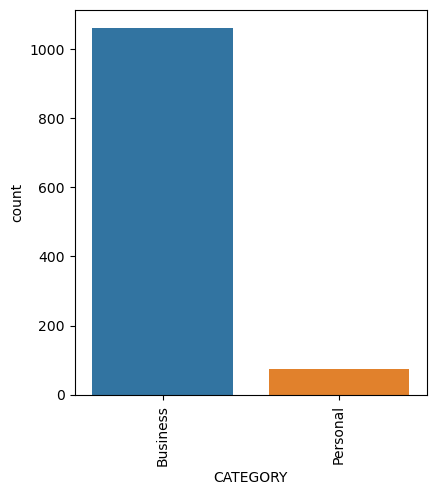

In [22]:
#countplot the CATEGORY and PURPOSE columns.
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x=df['CATEGORY'])
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

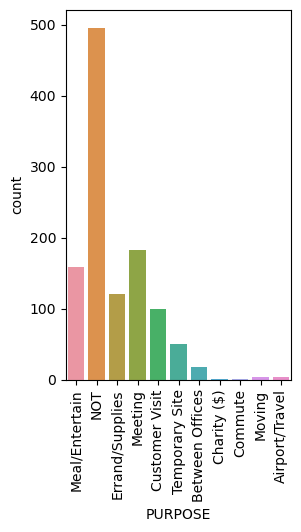

In [21]:
plt.subplot(1,2,2)
sns.countplot(x=df['PURPOSE'])
plt.xticks(rotation=90)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning'),
  Text(0, 1, 'Afternoon'),
  Text(0, 2, 'Evening'),
  Text(0, 3, 'Night')])

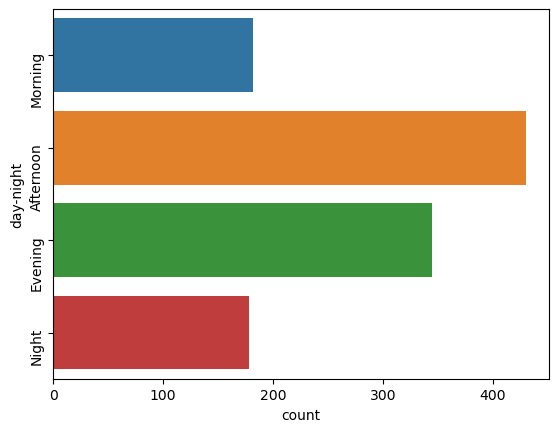

In [23]:
sns.countplot(y=df['day-night'])
plt.yticks(rotation=90)

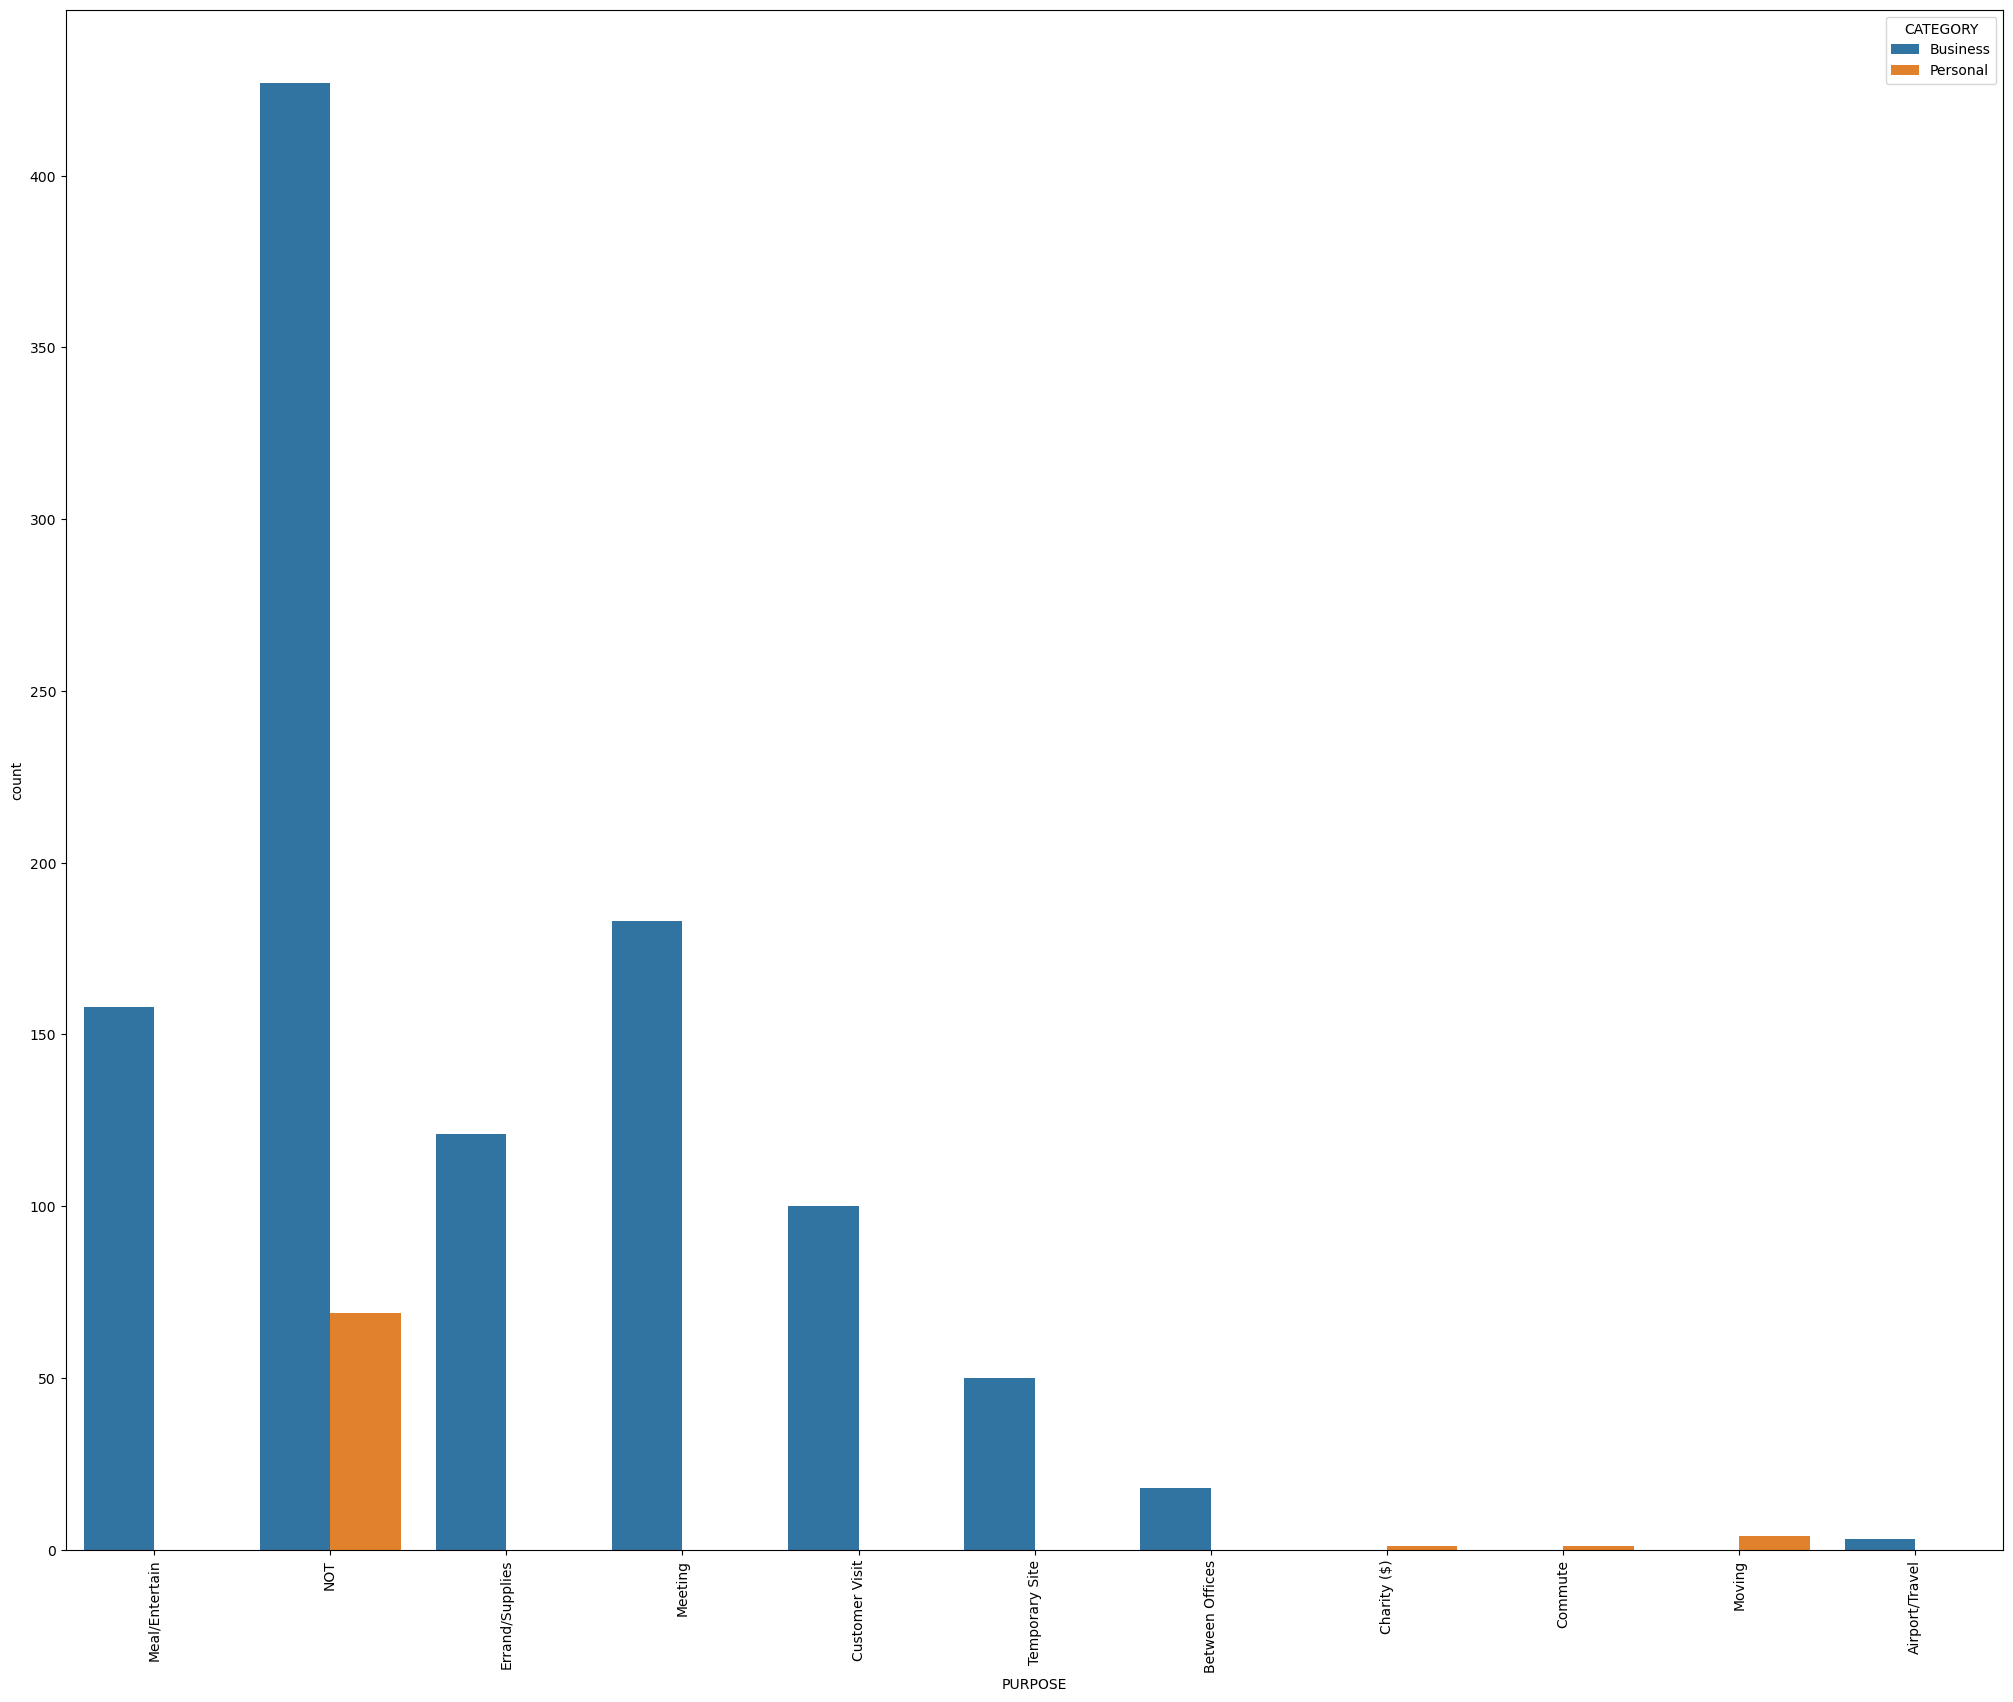

In [28]:
#comparing the two different categories along with the PURPOSE of the user.
plt.figure(figsize=(25, 20))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()


In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\UberDataset.csv")

# Check column names and remove spaces if necessary
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

# Verify if 'CATEGORY' and 'PURPOSE' exist
print(df.columns)  # Debugging step to check available columns

# Proceed only if the columns exist in df
object_cols = ['CATEGORY', 'PURPOSE']

missing_cols = [col for col in object_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: Missing columns in dataset: {missing_cols}")
else:
    OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))

    # Keep index consistency
    OH_cols.index = df.index
    OH_cols.columns = OH_encoder.get_feature_names_out()

    # Drop original categorical columns
    df_final = df.drop(object_cols, axis=1)

    # Concatenate new one-hot encoded columns
    df = pd.concat([df_final, OH_cols], axis=1)

print("One-hot encoding successful!")


Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')
One-hot encoding successful!


<Axes: >

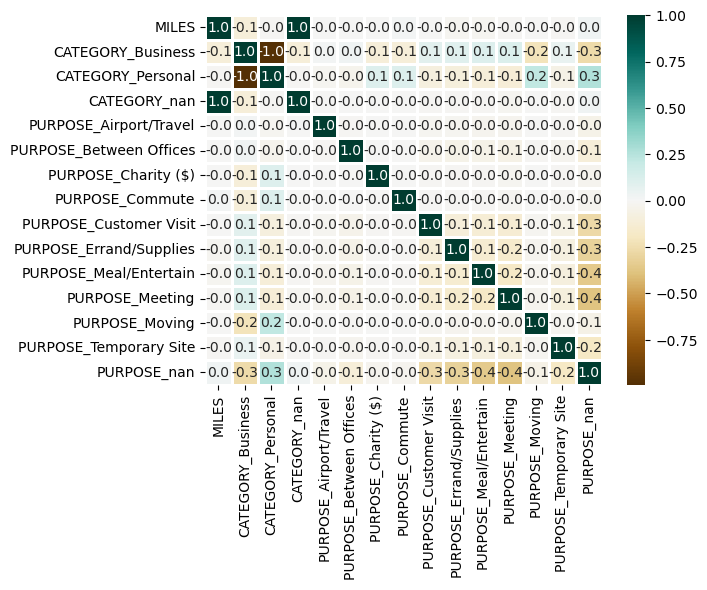

In [44]:
# correlation between the columns using heatmap.
numeric_dataset = df.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.1f', 
            linewidths=1, 
            annot=True)



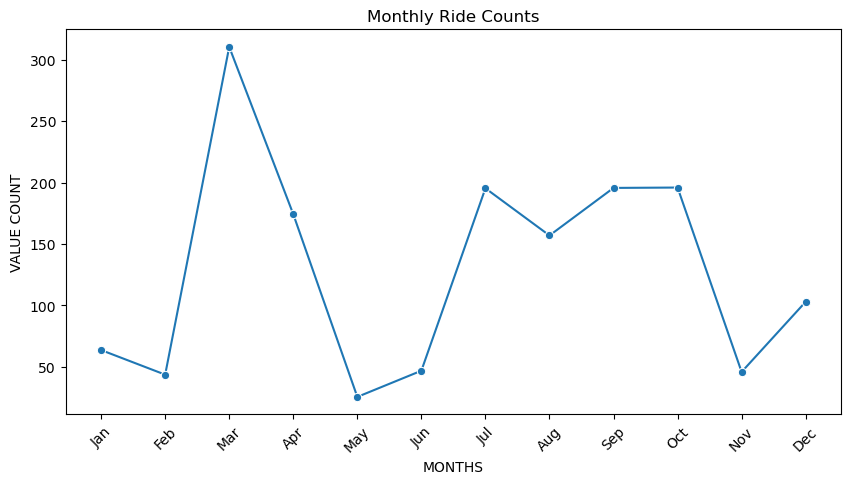

In [46]:
#plotting the count against months 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\UberDataset.csv")

# Ensure column names have no extra spaces
df.columns = df.columns.str.strip()

# Convert 'START_DATE' to datetime (coerce invalid values to NaT)
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

# Drop rows where 'START_DATE' couldn't be converted
df = df.dropna(subset=['START_DATE'])

# Extract month from 'START_DATE'
df['MONTH'] = df['START_DATE'].dt.month

# Mapping month numbers to names
month_label = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['MONTH'] = df['MONTH'].map(month_label)

# Check if 'MILES' column exists and is numeric
if 'MILES' in df.columns:
    df['MILES'] = pd.to_numeric(df['MILES'], errors='coerce')
    df = df.dropna(subset=['MILES'])  # Remove rows where MILES is NaN
else:
    print("Warning: 'MILES' column not found in dataset.")

# Count rides per month
mon = df['MONTH'].value_counts(sort=False)

# Create DataFrame for visualization
df1 = pd.DataFrame({
    "MONTHS": mon.index,
    "VALUE COUNT": df.groupby('MONTH', sort=False)['MILES'].max()
})

# Sort by month order
df1 = df1.sort_index(key=lambda x: x.map(month_label))

# Plot
plt.figure(figsize=(10, 5))
p = sns.lineplot(data=df1, x="MONTHS", y="VALUE COUNT", marker='o')
p.set(xlabel="MONTHS", ylabel="VALUE COUNT", title="Monthly Ride Counts")
plt.xticks(rotation=45)
plt.show()


In [48]:
##plotting the count against Days  
df['DAY'] = df.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df['DAY'] = df['DAY'].map(day_label)


Text(0, 0.5, 'COUNT')

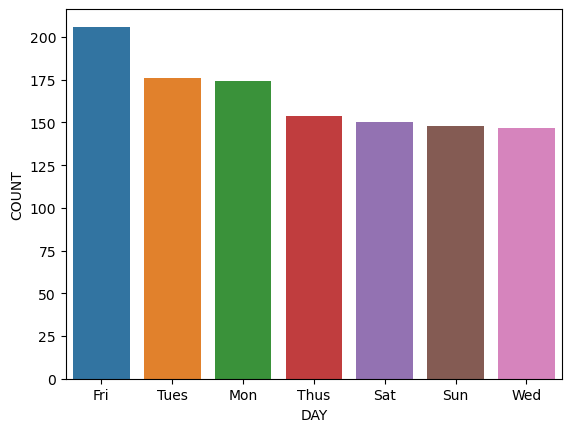

In [49]:
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


<Axes: >

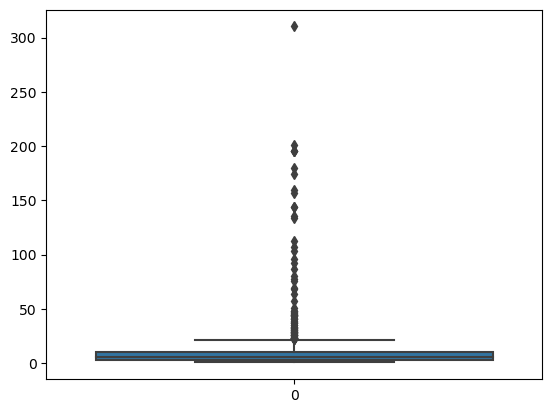

In [51]:
#boxplot to check the distribution of the column.
sns.boxplot(df['MILES'])


<Axes: >

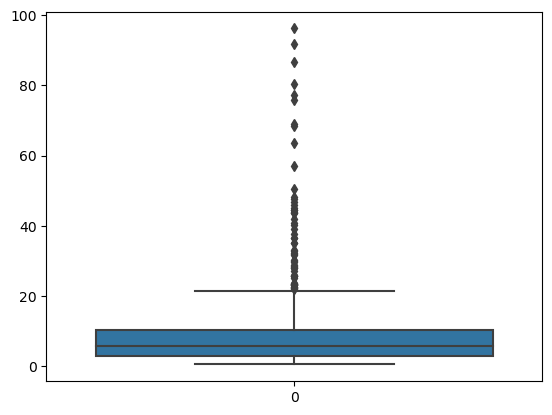

In [52]:
#zoom in it for values lees than 100.
sns.boxplot(df[df
               ['MILES']<100]['MILES'])


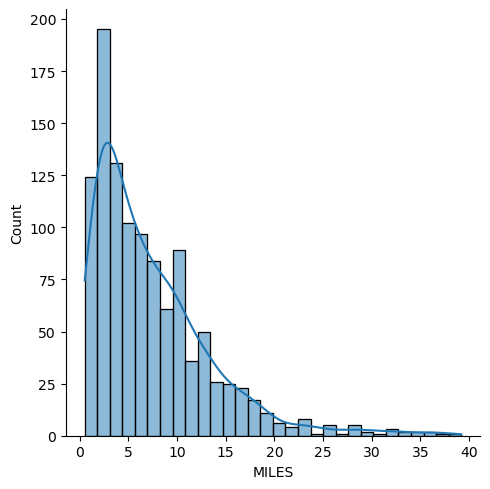

In [54]:
#using distplot for values less than 40.
sns.displot(df[df['MILES'] < 40]['MILES'], bins=30, kde=True)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


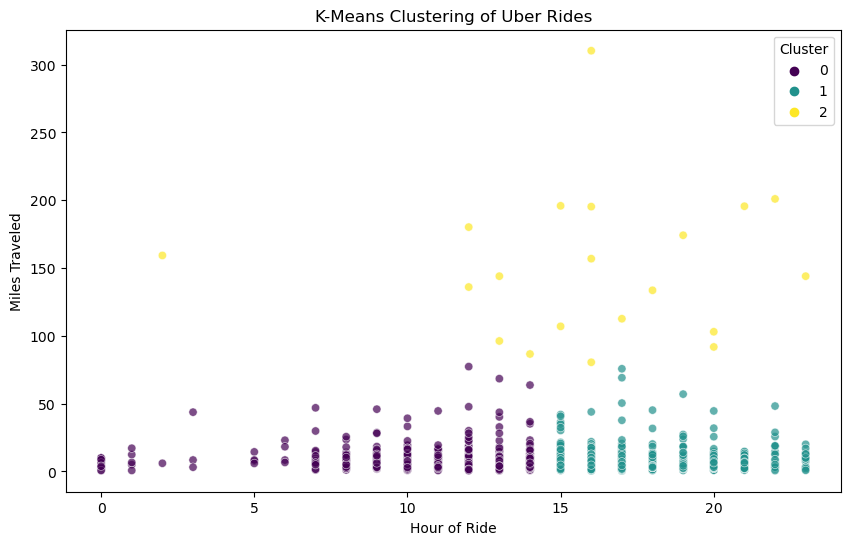

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Load dataset
df=pd.read_csv("UberDataset.csv")

# Convert START_DATE to datetime & extract hour
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['hour'] = df['START_DATE'].dt.hour  # Extract hour of the ride

# Select relevant columns & drop missing values
df_filtered = df[['MILES', 'hour']].dropna()

# Standardize data for better clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# Apply K-Means clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_filtered['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_filtered['hour'],
    y=df_filtered['MILES'],
    hue=df_filtered['Cluster'],
    palette='viridis',
    alpha=0.7
)
plt.xlabel('Hour of Ride')
plt.ylabel('Miles Traveled')
plt.title('K-Means Clustering of Uber Rides')
plt.legend(title="Cluster")
plt.show()


In [2]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_scaled, df_filtered['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.4967
